In [ ]:
import pandas as pd
dta = pd.read_csv('/content/data_training.csv',delimiter=";")
dta.head()

In [ ]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459965 entries, 0 to 459964
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DocsDate              459965 non-null  object
 1   ImportDuty_IDR        459965 non-null  int64 
 2   CIF                   459965 non-null  object
 3   Valuta_CIF            459965 non-null  object
 4   Using_Intermediaries  459965 non-null  int64 
 5   Using_TradeAgreement  459965 non-null  int64 
 6   COuntryOfOrigin       459962 non-null  object
 7   HSCODE                459965 non-null  int64 
 8   CustChannel           459965 non-null  object
dtypes: int64(4), object(5)
memory usage: 31.6+ MB


# Data Cleaning

In [ ]:
dta["DocsDate"] = pd.to_datetime(dta["DocsDate"],dayfirst=True)

dta["CIF"] = [float(str(i).replace(",", "")) for i in dta["CIF"]]
dta['CIF'] = dta['CIF'].astype('int')

In [ ]:
categorical_cols = ['Valuta_CIF','COuntryOfOrigin','HSCODE','CustChannel']

for col in categorical_cols:
  dta[col] = dta[col].astype('category')

In [ ]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459965 entries, 0 to 459964
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DocsDate              459965 non-null  datetime64[ns]
 1   ImportDuty_IDR        459965 non-null  int64         
 2   CIF                   459965 non-null  int64         
 3   Valuta_CIF            459965 non-null  category      
 4   Using_Intermediaries  459965 non-null  int64         
 5   Using_TradeAgreement  459965 non-null  int64         
 6   COuntryOfOrigin       459962 non-null  category      
 7   HSCODE                459965 non-null  category      
 8   CustChannel           459965 non-null  category      
dtypes: category(4), datetime64[ns](1), int64(4)
memory usage: 19.8 MB


In [ ]:
dta['COuntryOfOrigin'] = dta['COuntryOfOrigin'].fillna(dta['COuntryOfOrigin'].mode())

# Data processing

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for col in categorical_cols:
  dta[col] = labelencoder.fit_transform(dta[col])

In [ ]:
dta.head()

,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,2022-10-09,254458953,170458,19,0,0,110,836,0
1,2022-05-02,1719402722,1237513,19,0,0,78,369,0
2,2022-04-02,662630024,40640204,10,0,0,58,626,0
3,2022-05-08,7443742,1159783,10,1,0,21,746,0
4,2022-08-02,20795848,207958981,8,0,0,77,836,0


In [ ]:
print(labelencoder.classes_)

['Green' 'Red' 'Yellow']


In [ ]:
del dta['DocsDate']

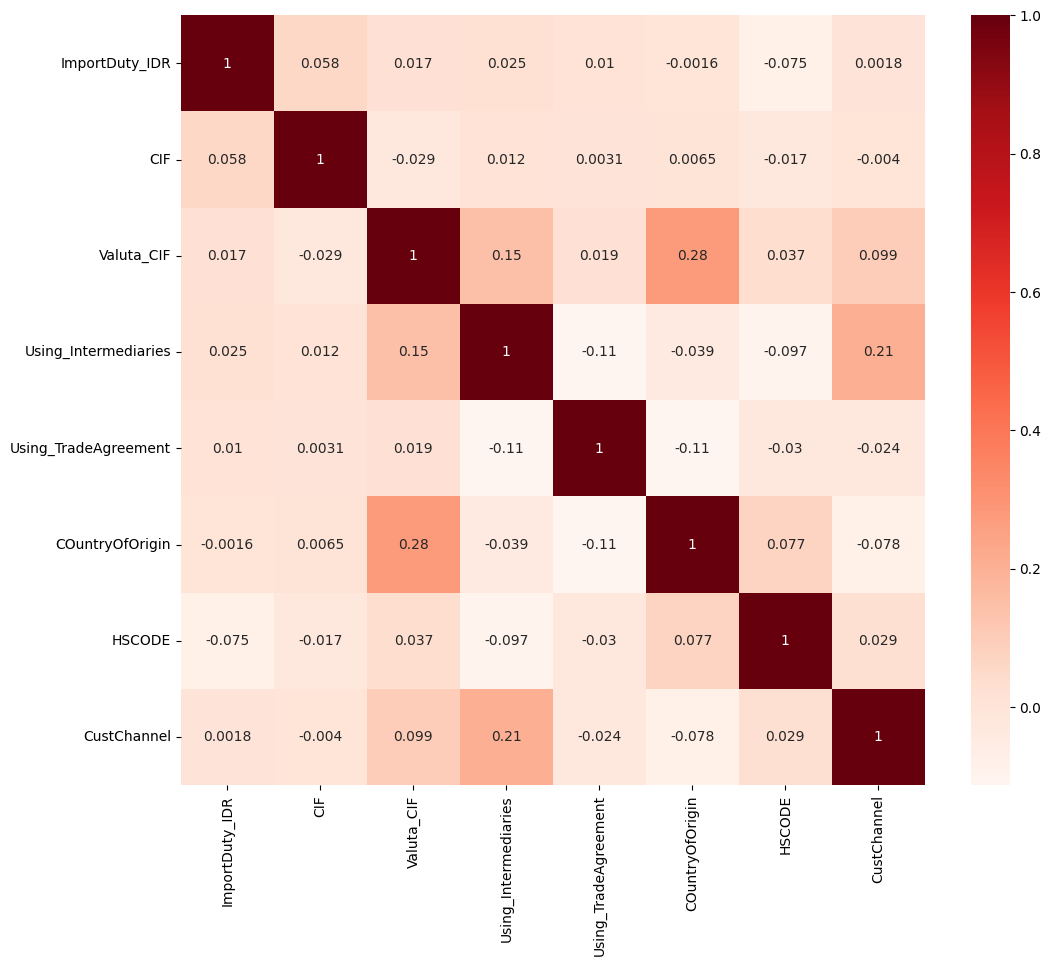

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
cor = dta.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["CustChannel"])
cor_target

ImportDuty_IDR          0.001806
CIF                     0.003997
Valuta_CIF              0.099327
Using_Intermediaries    0.205860
Using_TradeAgreement    0.023683
COuntryOfOrigin         0.078176
HSCODE                  0.029385
CustChannel             1.000000
Name: CustChannel, dtype: float64

In [ ]:
col_name=list(dta.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dta_scaled = scaler.fit_transform(dta.drop("CustChannel",axis=1).to_numpy())
labels = list(dta['CustChannel'])
dta_scaled = pd.DataFrame(dta_scaled,columns=col_name[:7])
dta_scaled['CustChannel'] = labels

In [ ]:
dta_scaled.head()

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,-0.061701,-0.025263,0.840033,-1.145881,-0.34143,1.501341,0.994701,0
1,-0.009409,-0.025263,0.840033,-1.145881,-0.34143,0.523350,-1.171275,0
2,-0.047131,-0.025263,-0.786385,-1.145881,-0.34143,-0.087895,0.020707,0
3,-0.070518,-0.025263,-0.786385,0.872691,-0.34143,-1.218697,0.577275,0
4,-0.070042,-0.025263,-1.147811,-1.145881,-0.34143,0.492788,0.994701,0


# Modelling

In [ ]:
from sklearn.model_selection import train_test_split
X, y = dta_scaled.drop("CustChannel",axis=1).values , dta_scaled["CustChannel"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_jobs=-1)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred4 = XGB.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix4 = metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix4

array([[104218,    351,    448],
       [  3662,   1224,    253],
       [  3824,     72,    940]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4, average='weighted'))

Accuracy: 0.9251252261026854
Precision: 0.9093541354603889


# Predicting

In [ ]:
test_dta = pd.read_csv('/content/data_testing.csv',delimiter=';')
test_dta.head()

In [ ]:
del test_dta['DocsDate']

In [ ]:
test_dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    39996 non-null  object
 1   ImportDuty_IDR        39996 non-null  int64 
 2   CIF                   39996 non-null  int64 
 3   Valuta_CIF            39996 non-null  object
 4   Using_Intermediaries  39996 non-null  int64 
 5   Using_TradeAgreement  39996 non-null  int64 
 6   COuntryOfOrigin       39996 non-null  object
 7   HSCODE                39996 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 2.4+ MB


In [ ]:
categorical_cols_test = ['Valuta_CIF','COuntryOfOrigin','HSCODE']

for col in categorical_cols_test:
  test_dta[col] = test_dta[col].astype('category')

In [ ]:
for col in categorical_cols_test:
  test_dta[col] = labelencoder.fit_transform(test_dta[col])

In [ ]:
test_dta.head()

,ID,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,C1,28212800050,41584240,18,0,0,60,5
1,C2,259418090,13014510,10,0,0,43,266
2,C3,2597872060,1413620,18,0,0,79,452
3,C4,11550943500,15789680,18,1,1,12,631
4,C5,1871500400,95652240,10,1,0,43,253


In [ ]:
col_name_test=list(test_dta.columns)
col_name_test[1:]

['ImportDuty_IDR',
 'CIF',
 'Valuta_CIF',
 'Using_Intermediaries',
 'Using_TradeAgreement',
 'COuntryOfOrigin',
 'HSCODE']

In [ ]:
test_dta_scaled = scaler.fit_transform(test_dta.drop("ID",axis=1).to_numpy())
ids = list(test_dta['ID'])
test_dta_scaled = pd.DataFrame(test_dta_scaled,columns=col_name_test[1:])

In [ ]:
test_dta_scaled.head()

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,0.041746,-0.048569,0.832007,-1.143637,-0.341762,0.681293,-2.698607
1,-0.098078,-0.048687,-0.744810,-1.143637,-0.341762,-0.012230,-1.138030
2,-0.086381,-0.048734,0.832007,-1.143637,-0.341762,1.456408,-0.025894
3,-0.041597,-0.048675,0.832007,0.874403,2.926014,-1.276890,1.044386
4,-0.090014,-0.048347,-0.744810,0.874403,-0.341762,-0.012230,-1.215760


In [ ]:
from sklearn.model_selection import train_test_split
X1, y1 = dta_scaled.drop("CustChannel",axis=1).values, dta_scaled["CustChannel"]

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_jobs=-1)
XGB.fit(X1, y1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = XGB.predict(test_dta_scaled)

In [ ]:
res = pd.DataFrame(list(zip(ids,y_pred)),columns=['ID','Prediction'])
res

,ID,Prediction
0,C1,0
1,C2,0
2,C3,0
3,C4,1
4,C5,0
...,...,...
39991,C39992,0
39992,C39993,0
39993,C39994,0
39994,C39995,0


In [ ]:
res['Prediction'].value_counts()

0    37819
1     2137
2       40
Name: Prediction, dtype: int64

In [ ]:
cc_maps ={0 : 'Green', 1 : 'Red', 2 : 'Yellow'}
res['CustChannel'] = res['Prediction'].map(cc_maps)

In [ ]:
del res['Prediction']

In [ ]:
res

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Red
4,C5,Green
...,...,...
39991,C39992,Green
39992,C39993,Green
39993,C39994,Green
39994,C39995,Green


In [ ]:
res['CustChannel'].value_counts()

Green     37819
Red        2137
Yellow       40
Name: CustChannel, dtype: int64

In [ ]:
res.to_csv('SubmissionDataBattlePenerimaanII_yashintns.csv',index=False)

In [ ]:
pd.read_csv('/content/SubmissionDataBattlePenerimaanII_yashintns.csv')

,ID;CustChannel
0,C1;Green
1,C2;Green
2,C3;Green
3,C4;Red
4,C5;Green
...,...
39991,C39992;Green
39992,C39993;Green
39993,C39994;Green
39994,C39995;Green
